In [1]:
import datetime
import pytz
import os
import matplotlib
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
# data preprocessing code from https://www.kaggle.com/smitad/bitcoin-trading-strategy-simulation
#define a conversion function for the native timestamps in the csv file
def dateparse (time_in_secs):    
    return datetime.datetime.fromtimestamp(float(time_in_secs))

data = pd.read_csv('../../datasets/bitcoin/bitstampUSD_1-min_data_2012-01-01_to_2017-10-20.csv', parse_dates=True, date_parser=dateparse, index_col=[0])
data_no_idx = pd.read_csv('../../datasets/bitcoin/bitstampUSD_1-min_data_2012-01-01_to_2017-10-20.csv', parse_dates=[0], date_parser=dateparse)
data.tail()

,Open,High,Low,Close,Volume_(BTC),Volume_(Currency),Weighted_Price
Timestamp,,,,,,,
2017-10-20 01:56:00,5690.88,5690.88,5690.88,5690.88,0.168941,961.421706,5690.880000
2017-10-20 01:57:00,5698.13,5704.10,5695.63,5704.10,2.311662,13174.852877,5699.300163
2017-10-20 01:58:00,5695.62,5695.64,5694.00,5695.64,0.129647,738.409647,5695.533637
2017-10-20 01:59:00,5700.39,5700.39,5698.69,5698.69,0.085426,486.929798,5700.004031
2017-10-20 02:00:00,5700.00,5700.00,5698.68,5700.00,0.116847,665.913860,5699.046463


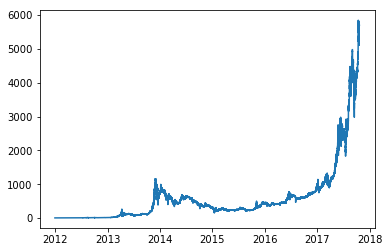

In [3]:
# Plot BTC opening price
plt.plot(data.index,data['Open'])

plt.show()


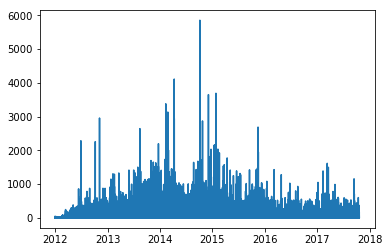

In [4]:
# Plot BTC trading volume (BTC)
plt.plot(data.index,data['Volume_(BTC)'])

plt.show()

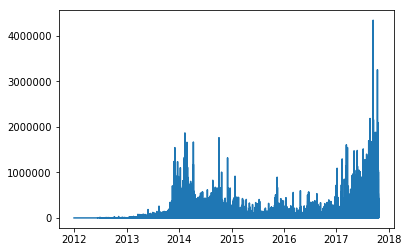

In [5]:
# Plot BTC trading volume (Currency)
plt.plot(data.index,data['Volume_(Currency)'])

plt.show()

In [6]:
# create valid date range
start = datetime.datetime(2012, 1, 1, 0, 0, 0, 0, pytz.UTC)
end = datetime.datetime(2017, 10, 17, 20, 0, 0, 0, pytz.UTC)

# find rows between start and end time and find the first row (00:00 monday morning)
weekly_rows = data_no_idx[(data_no_idx['Timestamp'] >= start) & (data_no_idx['Timestamp'] <= end)].groupby([pd.Grouper(key='Timestamp', freq='W-MON')]).first().reset_index()
weekly_rows.tail(10)

,Timestamp,Open,High,Low,Close,Volume_(BTC),Volume_(Currency),Weighted_Price
294,2017-08-21,4289.50,4289.50,4286.10,4289.33,3.626123,15552.522398,4289.022048
295,2017-08-28,4029.93,4029.93,4012.55,4026.93,3.082471,12379.070303,4015.957181
296,2017-09-04,4377.82,4381.34,4376.03,4381.34,54.684554,239419.785010,4378.197596
297,2017-09-11,4378.76,4378.76,4355.42,4355.76,7.730152,33788.732966,4371.031083
298,2017-09-18,4192.18,4192.18,4192.16,4192.18,0.083066,348.226257,4192.176661
299,2017-09-25,4073.00,4075.00,4069.38,4075.00,11.123117,45325.336822,4074.877279
300,2017-10-02,3954.96,3962.21,3949.39,3949.39,92.318867,365403.571970,3958.059531
301,2017-10-09,4374.45,4374.46,4360.05,4374.40,25.531922,111498.106110,4367.008004
302,2017-10-16,4798.20,4817.60,4798.20,4810.04,5.931340,28519.437799,4808.262480
303,2017-10-23,5703.51,5705.00,5697.45,5704.99,2.532021,14439.634029,5702.810644


In [7]:
dayOfWeek={0:'Mon', 1:'Tue', 2:'Wed', 3:'Thu', 4:'Fri', 5:'Sat', 6:'Sun'}
dayOrder = list(dayOfWeek.values())
data['Day of Week'] = data.index.dayofweek
data['Month'] = data.index.month
data['Day of Week'] = data['Day of Week'].apply(lambda x: dayOfWeek[x])
data.tail()

,Open,High,Low,Close,Volume_(BTC),Volume_(Currency),Weighted_Price,Day of Week,Month
Timestamp,,,,,,,,,
2017-10-20 01:56:00,5690.88,5690.88,5690.88,5690.88,0.168941,961.421706,5690.880000,Fri,10
2017-10-20 01:57:00,5698.13,5704.10,5695.63,5704.10,2.311662,13174.852877,5699.300163,Fri,10
2017-10-20 01:58:00,5695.62,5695.64,5694.00,5695.64,0.129647,738.409647,5695.533637,Fri,10
2017-10-20 01:59:00,5700.39,5700.39,5698.69,5698.69,0.085426,486.929798,5700.004031,Fri,10
2017-10-20 02:00:00,5700.00,5700.00,5698.68,5700.00,0.116847,665.913860,5699.046463,Fri,10


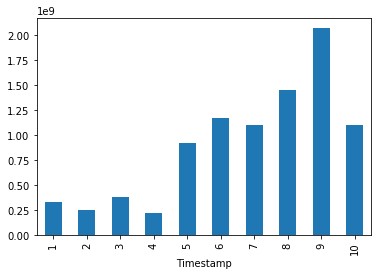

In [8]:
# find rows between start and end time and find the first row (00:00 monday morning)
year_2017 = data['2017-01-01':'2017-12-31']

#f, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, sharex='col', sharey='row',figsize=(15,15))

#weekly_vol_curr_avg = data_no_idx.groupby([pd.Grouper(key='Timestamp', freq='D')])
##vol_curr_monthly_sum= year_2017.resample('M')['Volume_(Currency)'].sum()
##vol_curr_monthly_count= year_2017.resample('M')['Volume_(Currency)'].count()
##vol_curr_monthly_mean= year_2017.resample('M')['Volume_(Currency)'].mean()

m = year_2017.groupby(pd.TimeGrouper("M"))['Volume_(Currency)'].sum()
m.index.month
m.plot(kind='bar').set_xticklabels(m.index.month)
#year_2017.pivot(index='Day of Week', columns='Month', values='Volume_(Currency)').plot(kind='bar')
#weekdays_trading_vol = year_2017.groupby([pd.Grouper(key='Day of Week')])['Volume_(Currency)'].sum()
#weekdays_trading_vol.loc[dayOrder].plot(kind='bar')



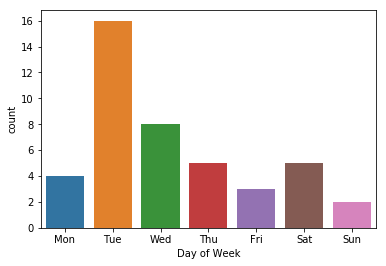

In [9]:
# find indices with min value of that week
idx2 = year_2017.groupby(pd.TimeGrouper("W-MON"))['Close'].transform(min) == year_2017['Close']

# remove duplicate day rows
weekly_lows = year_2017[idx2].groupby(pd.TimeGrouper("D")).first().reset_index()

sns.countplot(x='Day of Week',data=weekly_lows, order=['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun'])

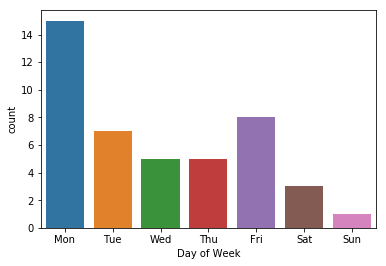

In [173]:
# find indices with min value of that week
idx2 = year_2017.groupby(pd.TimeGrouper("W-MON"))['High'].transform(max) == year_2017['High']

# remove duplicate day rows
weekly_lows = year_2017[idx2].groupby(pd.TimeGrouper("D")).first().reset_index()

sns.countplot(x='Day of Week',data=weekly_lows, order=['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun'])

In [10]:
idx2 = year_2017.groupby(pd.TimeGrouper("W-MON"))
for name, group in idx2:
    print(name)
    print(group['Volume_(Currency)'].sum())

2017-01-02 00:00:00
18232988.5605
2017-01-09 00:00:00
132585057.327
2017-01-16 00:00:00
80911651.6907
2017-01-23 00:00:00
57660233.001
2017-01-30 00:00:00
34410947.5783
2017-02-06 00:00:00
58999756.1524
2017-02-13 00:00:00
67158404.4194
2017-02-20 00:00:00
38433524.8766
2017-02-27 00:00:00
83379909.8764
2017-03-06 00:00:00
57674798.8587
2017-03-13 00:00:00
109897544.658
2017-03-20 00:00:00
97577787.6417
2017-03-27 00:00:00
85683000.1863
2017-04-03 00:00:00
71193701.0453
2017-04-10 00:00:00
50944209.632
2017-04-17 00:00:00
43924357.697
2017-04-24 00:00:00
45420982.4426
2017-05-01 00:00:00
63551392.633
2017-05-08 00:00:00
140993189.98
2017-05-15 00:00:00
160345724.664
2017-05-22 00:00:00
181845062.053
2017-05-29 00:00:00
352727061.797
2017-06-05 00:00:00
226121556.898
2017-06-12 00:00:00
315530147.021
2017-06-19 00:00:00
325592478.02
2017-06-26 00:00:00
251875278.976
2017-07-03 00:00:00
197896294.881
2017-07-10 00:00:00
165435441.547
2017-07-17 00:00:00
265754900.219
2017-07-24 00:00:00
